In [75]:
import matplotlib.pyplot as plt
import re
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

from collections import Counter

from sklearn.cluster import KMeans, DBSCAN

from apyori import apriori

from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer

In [76]:
gun_data = pd.read_excel('./Data/gun-violence-data_01-2013_03-2018.xlsx')

In [77]:
gun_data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [78]:
list_of_keywords=['url','source','notes','address','incident_id']

gun_data = gun_data[gun_data.columns.drop(list(gun_data.filter(regex='|'.join(list_of_keywords))))]
gun_data.head()

,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,...,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,2013-01-05,Colorado,Aurora,4,0,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [90]:
#copy gun data
gun_data_modified = gun_data.copy()

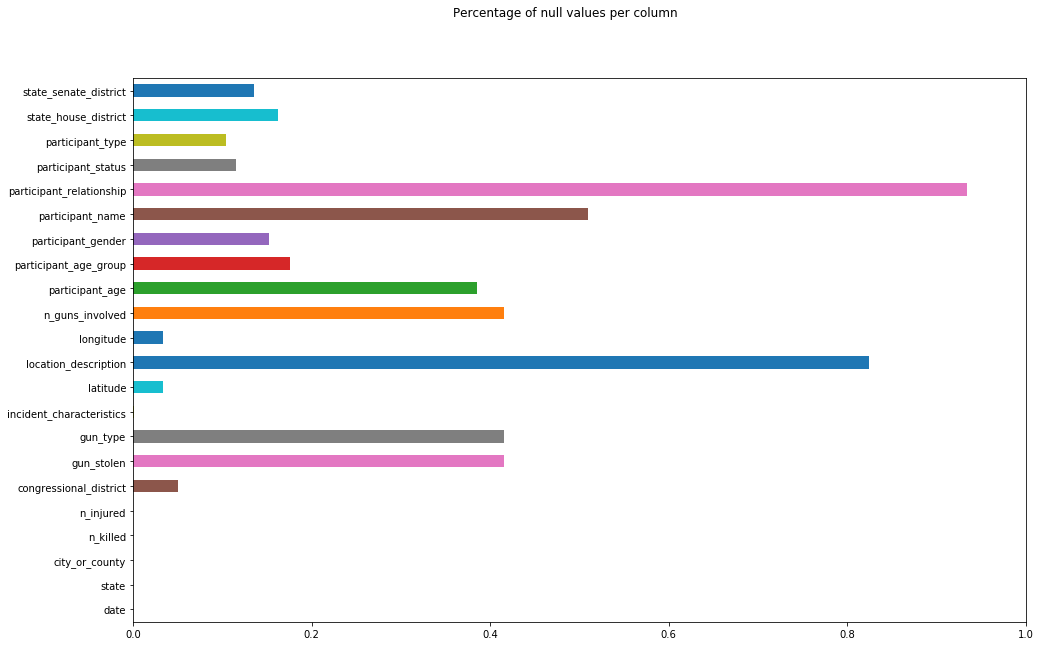

In [91]:
plt.figure(figsize=(16,10))
plt.xlim(0,1)
plt.suptitle('Percentage of null values per column')
gun_data_modified.isnull().mean().plot.barh();
plt.show()

In [92]:
# #Count number of NAs in incident characteristics column
# print(gun_data_modified.incident_characteristics.isna().sum()/len(gun_data_modified.incident_characteristics)*100)

In [93]:
na_cols = gun_data_modified.loc[:,gun_data_modified.isnull().mean()>.25].columns

for col in na_cols:
    print(col, ' column is ',round(gun_data_modified[col].isnull().mean(),2)*100,'% null')

gun_stolen  column is  42.0 % null
gun_type  column is  41.0 % null
location_description  column is  82.0 % null
n_guns_involved  column is  41.0 % null
participant_age  column is  39.0 % null
participant_name  column is  51.0 % null
participant_relationship  column is  93.0 % null


We are going to drop values that have over 50% missing values as we feel there is nothing inciteful that can be gained from such sparse data. Any additional columns with a high number of missing values can be used as a subset of the data for possible additional analysis

In [94]:
gun_data_modified = gun_data_modified.loc[:,gun_data_modified.isnull().mean()<.50]

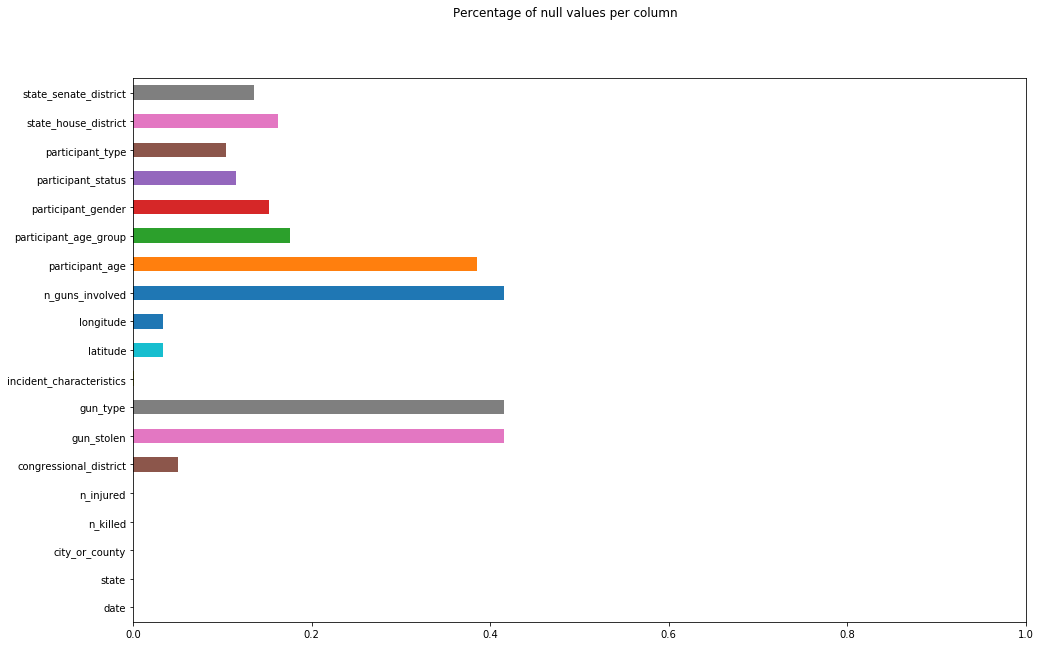

In [95]:
plt.figure(figsize=(16,10))
plt.xlim(0,1)
plt.suptitle('Percentage of null values per column')
gun_data_modified.isnull().mean().plot.barh();
plt.show()

We are going to replace the values in the given column based on the data type, with objects have a string of unknown

In [96]:
gun_data_modified.dtypes

date                        datetime64[ns]
state                               object
city_or_county                      object
n_killed                             int64
n_injured                            int64
congressional_district             float64
gun_stolen                          object
gun_type                            object
incident_characteristics            object
latitude                           float64
longitude                          float64
n_guns_involved                    float64
participant_age                     object
participant_age_group               object
participant_gender                  object
participant_status                  object
participant_type                    object
state_house_district               float64
state_senate_district              float64
dtype: object

In [97]:
for cols in gun_data_modified.columns:
    if gun_data_modified[cols].dtype==np.float64:
        print(cols)
    elif gun_data_modified[cols].dtype==np.object:
        gun_data_modified[cols].fillna('Unknown',inplace=True)
    elif gun_data_modified[cols].dtype==np.int64:
        print(cols)

n_killed
n_injured
congressional_district
latitude
longitude
n_guns_involved
state_house_district
state_senate_district


In [98]:
display(gun_data_modified.sample(10))

,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
34873,2014-09-03,Illinois,Chicago,0,1,5.0,Unknown,Unknown,Shot - Wounded/Injured||Drive-by (car to stree...,41.9558,-87.6933,NaN,0::35,0::Adult 18+,0::Male,0::Injured,0::Victim,11.0,6.0
98083,2015-11-07,Maryland,Annapolis,0,0,3.0,0::Unknown,0::Handgun,Non-Shooting Incident||Possession (gun(s) foun...,38.9684,-76.5184,1.0,0::16,0::Teen 12-17,0::Male,0::Arrested,0::Subject-Suspect,NaN,30.0
198145,2017-07-14,Kansas,Wichita,0,0,4.0,0::Unknown,0::Unknown,Institution/Group/Business||Non-Shooting Incid...,37.7156,-97.2856,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,84.0,29.0
138228,2016-07-30,Illinois,Chicago,1,0,7.0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Sui...",41.8859,-87.6251,1.0,0::31,0::Adult 18+,0::Female,0::Killed,0::Victim,5.0,3.0
207531,2017-09-07,District of Columbia,Washington,0,0,1.0,0::Unknown,0::22 LR,Non-Shooting Incident||ATF/LE Confiscation/Rai...,38.8292,-76.9949,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
235477,2018-03-04,Illinois,Chicago,0,0,5.0,0::Unknown,0::Unknown,Non-Shooting Incident||Car-jacking||Possession...,41.9669,-87.7755,1.0,Unknown,Unknown,Unknown,0::Unharmed||1::Unharmed,0::Subject-Suspect||1::Subject-Suspect,19.0,10.0
126713,2016-05-19,Maryland,Baltimore,1,0,7.0,Unknown,Unknown,"Shot - Dead (murder, accidental, suicide)",39.2928,-76.6225,NaN,Unknown,Unknown,0::Male,0::Killed,0::Victim,40.0,40.0
202383,2017-08-07,Alabama,Atmore,1,1,1.0,0::Unknown,0::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",31.0316,-87.4808,1.0,0::56||1::45,0::Adult 18+||1::Adult 18+,0::Male||1::Female||2::Male,0::Killed||1::Injured||2::Unharmed,0::Victim||1::Victim||2::Subject-Suspect,66.0,22.0
191659,2017-06-07,Wyoming,Casper,0,0,1.0,0::Unknown,0::Unknown,Non-Shooting Incident||ATF/LE Confiscation/Rai...,42.8442,-106.3230,1.0,0::24,0::Adult 18+,0::Male,"0::Unharmed, Arrested",0::Subject-Suspect,56.0,28.0
35546,2014-09-06,Maryland,Baltimore,0,1,7.0,Unknown,Unknown,Shot - Wounded/Injured,39.2847,-76.6487,NaN,Unknown,0::Adult 18+,0::Male,0::Injured,0::Victim,40.0,40.0


We are not going to use these rows to calculate the most common strings in the incidents column.

In [99]:



#drop any rows with na in the 
gun_data_modified.incident_characteristics.dropna(inplace=True)

#Split the data on || to create a series of lists
gun_data_modified.incident_characteristics = gun_data_modified.incident_characteristics.apply(lambda row: row.split('||'))

# #sets incidents to list
# incidents = gun_data_modified['incident_characteristics'].tolist()

# #drops nan values from list
# incidents = [x for x in incidents if str(x) != 'nan']

# #converts the list of lists to a list
# incidents = [item for sublist in incidents for item in sublist]
# #unique_incidents = set(incidents)
# #unique_incidents = list(unique_incidents)

# #get the top 10 most common strings in the list
# top_incidents = Counter(incidents).most_common(10)
incidents = gun_data_modified.incident_characteristics

In [100]:
rules = apriori(incidents, min_support = 0.003, min_confidence = .2, min_lift = 3, min_length = 2)

In [101]:
results = list(rules)

In [102]:
for i in range(10):
    base = list(results[i][2][0][0])[0]
    add = list(results[i][2][0][1])[0]
    conf = results[i][2][0][2]
    lift = results[i][2][0][3]
    print('With the base', base, 'there is a ', round(conf,2)*100,
          ' percent chance that ', add, 'will occur as well. There is a ', 
         round(lift,2), ' times lift with the two of these occuring')
    print('\n')


With the base Assault weapon (AR-15, AK-47, and ALL variants defined by law enforcement) there is a  46.0  percent chance that  ATF/LE Confiscation/Raid/Arrest will occur as well. There is a  6.08  times lift with the two of these occuring


With the base Criminal act with stolen gun there is a  43.0  percent chance that  ATF/LE Confiscation/Raid/Arrest will occur as well. There is a  5.75  times lift with the two of these occuring


With the base ATF/LE Confiscation/Raid/Arrest there is a  45.0  percent chance that  Drug involvement will occur as well. There is a  6.42  times lift with the two of these occuring


With the base ATF/LE Confiscation/Raid/Arrest there is a  80.0  percent chance that  Non-Shooting Incident will occur as well. There is a  4.3  times lift with the two of these occuring


With the base Officer Involved Incident - Weapon involved but no shots fired there is a  23.0  percent chance that  ATF/LE Confiscation/Raid/Arrest will occur as well. There is a  3.06  time

Replace Incident Characteristics column with binary column of incidents that have over 15,000 

In [119]:
gun_data_updated = gun_data_modified.copy()
print(gun_data_updated.shape)

gun_data_updated.incident_characteristics.fillna("NaN",inplace=True)

mlb = MultiLabelBinarizer()
incidents = pd.DataFrame(mlb.fit_transform(gun_data_updated.incident_characteristics),
                            columns=mlb.classes_,
                        index = gun_data_updated.index)


#print(incidents.sample(10))

incidents.drop([col for col, val in incidents.sum().iteritems() if val < 15000],axis=1,inplace=True)

incidents['Other'] = incidents.apply(lambda row:1 if row.sum()==0 else 0,axis=1) 

incidents.columns = ['incident_' + str(col) for col in incidents.columns]




(239677, 19)


In [120]:
gun_data_concat = pd.concat([gun_data_updated,incidents],sort=True,axis=1)

gun_data_concat.drop(['incident_characteristics'],axis='columns',inplace=True)

print(gun_data_concat.shape)
print(gun_data_concat.columns)

(239677, 30)
Index(['date', 'state', 'city_or_county', 'n_killed', 'n_injured',
       'congressional_district', 'gun_stolen', 'gun_type', 'latitude',
       'longitude', 'n_guns_involved', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_status',
       'participant_type', 'state_house_district', 'state_senate_district',
       'incident_ATF/LE Confiscation/Raid/Arrest',
       'incident_Armed robbery with injury/death and/or evidence of DGU found',
       'incident_Brandishing/flourishing/open carry/lost/found',
       'incident_Drug involvement', 'incident_Non-Shooting Incident',
       'incident_Officer Involved Incident',
       'incident_Possession (gun(s) found during commission of other crimes)',
       'incident_Possession of gun by felon or prohibited person',
       'incident_Shot - Dead (murder, accidental, suicide)',
       'incident_Shot - Wounded/Injured', 'incident_Shots Fired - No Injuries',
       'incident_Other'],
      dtype='ob

Incident columns

In [91]:
# print(incidents.sample(20))